# Data Analysis

In [71]:
#Importing libraries and data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
file_path1 = 'data/early_years_data.csv'
file_path2 = 'data/first_major_peak_data.csv'
file_path3 = 'data/post_stable_data.csv'
file_path4 = 'data/volatile_data.csv'
file_path5 = 'data/recent_data.csv'

early_data = pd.read_csv(file_path1)
first_mp_data = pd.read_csv(file_path2)
post_stable_data = pd.read_csv(file_path3)
volatile_data = pd.read_csv(file_path4)
recent_data = pd.read_csv(file_path5)

### Data Statistics - mean, median, sd, etc

In [73]:
# Dictionary of datasets
datasets = {
    "early_data": early_data,
    "first_mp_data": first_mp_data,
    "post_stable_data": post_stable_data,
    "volatile_data": volatile_data,
    "recent_data": recent_data
}

dfs = []

# Function to format numbers to avoid scientific notation
def format_number(x):
    return f"{x:.2f}"

# Calculating mean, median, standard deviation for each dataset
for key in datasets:
    data = datasets[key]
    # Creating a DataFrame to store the statistics
    df_stats = pd.DataFrame(index=data.columns, columns=["mean", "median", "std", "highest", "lowest"]).drop("Date", axis=0)
    
    # Calculating statistics
    df_stats["mean"] = data.mean()
    df_stats["median"] = data.median()
    df_stats["std"] = data.std()
    df_stats["highest"] = data.max()
    df_stats["lowest"] = data.min()
    
    # Formatting the numbers
    df_stats = df_stats.applymap(format_number)
    
    print(key)
    print(df_stats)
    dfs.append(df_stats)
    print()


early_data
                  mean       median          std       highest      lowest
Open            412.85       378.58       171.23        975.12      176.90
High            419.64       386.92       172.94        979.40      211.73
Low             406.44       372.93       169.78        954.50      171.51
Close           413.41       378.90       172.24        975.92      178.10
Adj Close       413.41       378.90       172.24        975.92      178.10
Volume     55418130.40  44184600.00  46816585.05  363320992.00  5914570.00

first_mp_data
                    mean         median            std         highest  \
Open             5785.83        6250.52        3798.06        19475.80   
High             5966.33        6364.43        3958.88        20089.00   
Low              5581.23        6122.10        3588.43        18974.10   
Close            5789.17        6252.71        3794.38        19497.40   
Adj Close        5789.17        6252.71        3794.38        19497.40   
Volum

As we see above, the statistics account for a year by by average, but don't account for extreme events, such as when BTC reaches $50-60k+ during in-year quarterly volatility periods. As such, we have to examine each period separately.

### Early Years Analysis

In [74]:
#Redoing stats for reference
dfs[0]

,mean,median,std,highest,lowest
Open,412.85,378.58,171.23,975.12,176.90
High,419.64,386.92,172.94,979.40,211.73
Low,406.44,372.93,169.78,954.50,171.51
Close,413.41,378.90,172.24,975.92,178.10
Adj Close,413.41,378.90,172.24,975.92,178.10
Volume,55418130.40,44184600.00,46816585.05,363320992.00,5914570.00


In [75]:
early_data['Date'] = pd.to_datetime(early_data['Date'])
early_data.set_index('Date', inplace=True)
early_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0
...,...,...,...,...,...,...
2016-12-27,908.354004,940.047974,904.255005,933.197998,933.197998,167308000.0
2016-12-28,934.830994,975.921021,934.830994,975.921021,975.921021,236630000.0
2016-12-29,975.125000,979.396973,954.502991,973.497009,973.497009,199320000.0


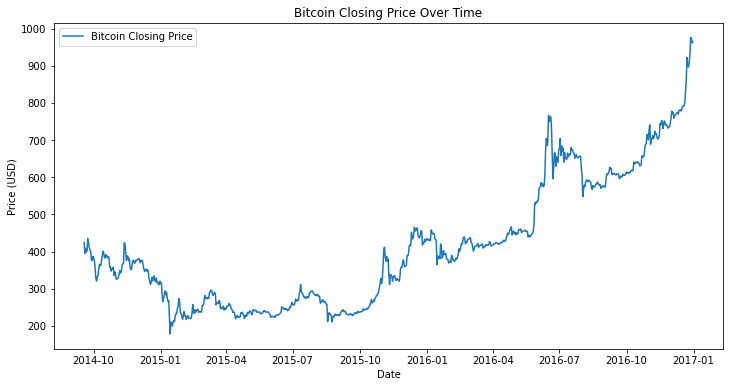

In [76]:
#Line graph of this period

plt.figure(figsize=(12, 6))
plt.plot(early_data['Close'], label='Bitcoin Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

As above we can see a volatility period between 10-2014 to 10-2015. Then onwards we see a price surge followed by a correction period in mid 2017, which is typical for any stock. The key takeaway here is ensuring to invest during market corrections so that the algorithm can maximize profit in the long run. Need to look at macro-economic concerns regarding market inflation which potentially led to surging BTC prices.

Now identifying bull, bear and correction periods:

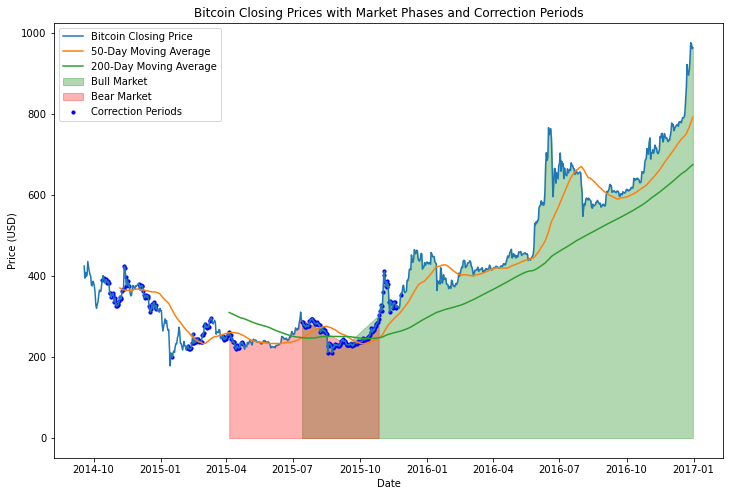

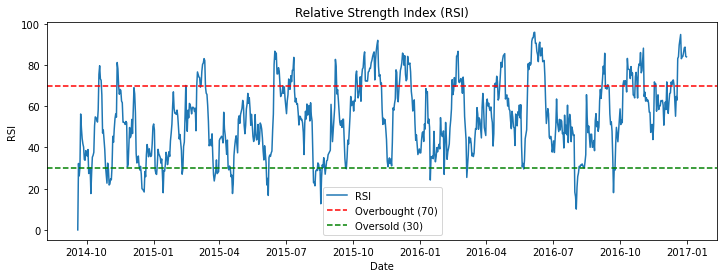

In [77]:
# Calculate moving averages
early_data['50_MA'] = early_data['Close'].rolling(window=50).mean()
early_data['200_MA'] = early_data['Close'].rolling(window=200).mean()

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

early_data['RSI'] = calculate_rsi(early_data['Close'])

# Identify bull, bear, and correction periods
bull_markets = early_data[(early_data['50_MA'] > early_data['200_MA'])]
bear_markets = early_data[(early_data['50_MA'] < early_data['200_MA'])]

# Correction periods: Look for drops of more than 10% from a recent high within bull markets
correction_periods = pd.DataFrame(index=early_data.index, columns=['is_correction'])
high_price = 0
correction_threshold = 0.10

for i in range(len(bull_markets)):
    if bull_markets['Close'].iloc[i] > high_price:
        high_price = bull_markets['Close'].iloc[i]
    elif bull_markets['Close'].iloc[i] < high_price * (1 - correction_threshold):
        correction_periods['is_correction'].iloc[i] = True
    else:
        correction_periods['is_correction'].iloc[i] = False

early_data['is_correction'] = correction_periods['is_correction'].fillna(False)

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot closing prices and moving averages
plt.plot(early_data['Close'], label='Bitcoin Closing Price')
plt.plot(early_data['50_MA'], label='50-Day Moving Average')
plt.plot(early_data['200_MA'], label='200-Day Moving Average')

# Marking bull and bear phases based on moving averages
plt.fill_between(bull_markets.index, bull_markets['Close'], color='green', alpha=0.3, label='Bull Market')
plt.fill_between(bear_markets.index, bear_markets['Close'], color='red', alpha=0.3, label='Bear Market')

# Highlight correction periods within bull markets
corrections = early_data[(early_data['is_correction'] == True)]
plt.scatter(corrections.index, corrections['Close'], color='blue', s=10, label='Correction Periods')

plt.title('Bitcoin Closing Prices with Market Phases and Correction Periods')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(12, 4))
plt.plot(early_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

As shown above, we can clearly identify the bear market, bull market, and the transition between them. **The transition between them is marked by a lot of correction periods, which can indicate a stabilizing growth. Also whenever the 50 day average is greater than the 200 day average, we see a bull growth that is steady and linear.** Take this into consideration when designing models.

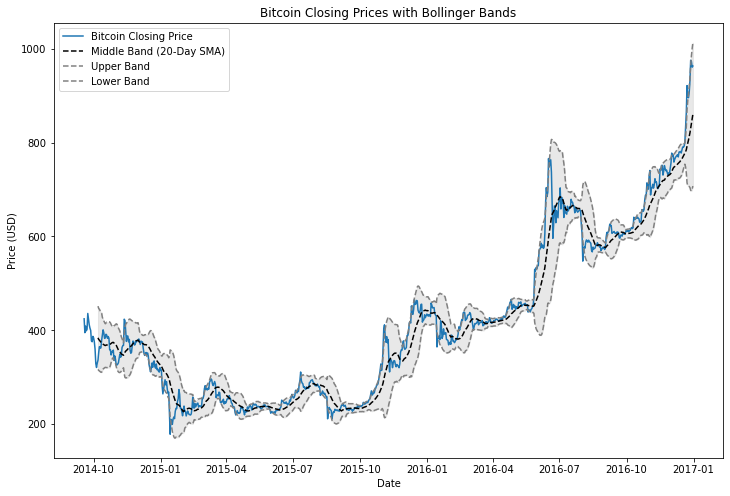

In [78]:
# Calculate Bollinger Bands
early_data['Middle Band'] = early_data['Close'].rolling(window=20).mean()
early_data['Upper Band'] = early_data['Middle Band'] + 2*early_data['Close'].rolling(window=20).std()
early_data['Lower Band'] = early_data['Middle Band'] - 2*early_data['Close'].rolling(window=20).std()

# Plotting Bollinger Bands separately
plt.figure(figsize=(12, 8))

# Plot closing prices and Bollinger Bands
plt.plot(early_data['Close'], label='Bitcoin Closing Price')
plt.plot(early_data['Middle Band'], label='Middle Band (20-Day SMA)', linestyle='--', color='black')
plt.plot(early_data['Upper Band'], label='Upper Band', linestyle='--', color='grey')
plt.plot(early_data['Lower Band'], label='Lower Band', linestyle='--', color='grey')

plt.fill_between(early_data.index, early_data['Lower Band'], early_data['Upper Band'], color='lightgrey', alpha=0.5)

plt.title('Bitcoin Closing Prices with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

As shown by Bollinger bands above, volatility gap increases during increased trading volume periods. Overall,  BTC is extremely volatile unless in conditions where the trading volume is low, or in correction periods.

Overall, we can understand how BTC moves in its early years, trading volume is correlated with volatility, and it follows a typical RSI when being overbought and oversold. When there's trader confidence, we see the 50 MA increase substantially over the 200 MA. Because of this, volatility ensues, suggesting that in a bull market is when BTC fluctuates the most. In these fluctuations, we can exploit profit in day-to-day trading volatility and randomness.

### First Major Peak Analysis


In [79]:
dfs[1]

,mean,median,std,highest,lowest
Open,5785.83,6250.52,3798.06,19475.80,775.18
High,5966.33,6364.43,3958.88,20089.00,823.31
Low,5581.23,6122.10,3588.43,18974.10,755.76
Close,5789.17,6252.71,3794.38,19497.40,777.76
Adj Close,5789.17,6252.71,3794.38,19497.40,777.76
Volume,4223209536.84,3785575000.00,3912001409.00,23840899072.00,60851700.00


In [80]:
first_mp_data['Date'] = pd.to_datetime(first_mp_data['Date'])
first_mp_data.set_index('Date', inplace=True)
first_mp_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,1.477750e+08
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,2.221850e+08
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,1.851680e+08
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,3.449460e+08
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,5.101990e+08
...,...,...,...,...,...,...
2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496,3654.833496,5.130222e+09
2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701,3923.918701,5.631554e+09
2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691,3820.408691,4.991656e+09


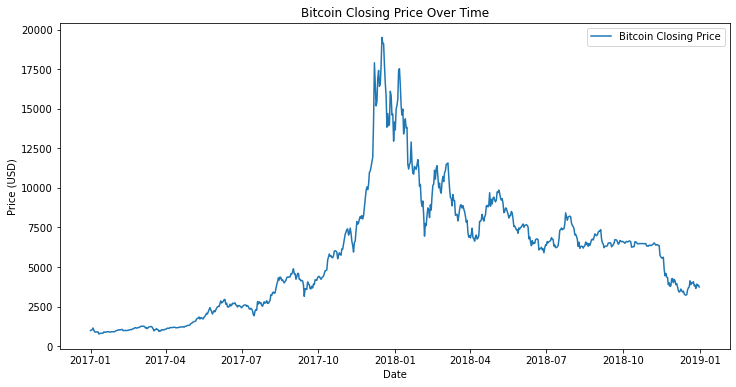

In [81]:
#Line graph of this period
plt.figure(figsize=(12, 6))
plt.plot(first_mp_data['Close'], label='Bitcoin Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

The first major peak is clearly defined - we can see an exponential rise until it peaks, and fluctuates downwards once it happens. The downward fluctuation can be explained by lack of investor confidence, however the pattern afterwards is not abundantly clear. Hence more analysis will be required.

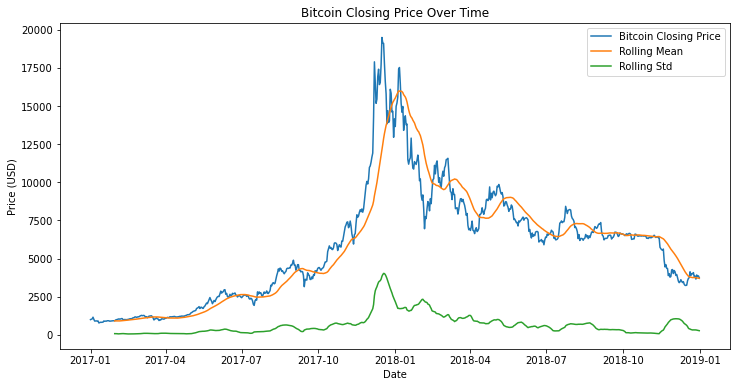

In [82]:
#Rolling statistics
first_mp_data['Rolling Mean'] = first_mp_data['Close'].rolling(window=30).mean()
first_mp_data['Rolling Std'] = first_mp_data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(first_mp_data['Close'], label='Bitcoin Closing Price')
plt.plot(first_mp_data['Rolling Mean'], label='Rolling Mean')
plt.plot(first_mp_data['Rolling Std'], label='Rolling Std')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Rolling mean and standard deviation fits the pattern shown by closing prices. Towards the middle, we see a increased volatility - indicated by the standard dev - when the price reaches its maximum

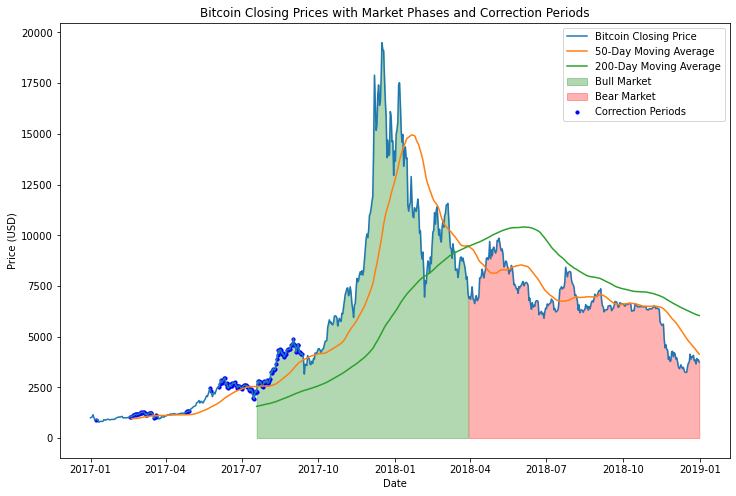

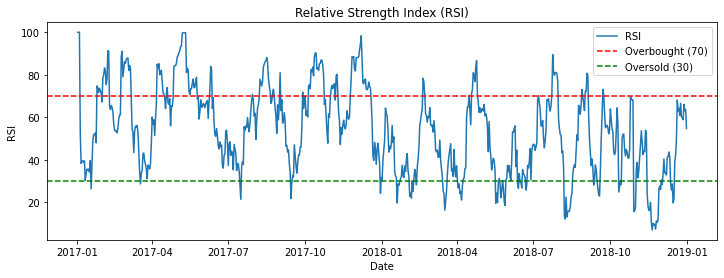

In [83]:
# Calculate moving averages
first_mp_data['50_MA'] = first_mp_data['Close'].rolling(window=50).mean()
first_mp_data['200_MA'] = first_mp_data['Close'].rolling(window=200).mean()

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

first_mp_data['RSI'] = calculate_rsi(first_mp_data['Close'])

# Identify bull, bear, and correction periods
bull_markets = first_mp_data[(first_mp_data['50_MA'] > first_mp_data['200_MA'])]
bear_markets = first_mp_data[(first_mp_data['50_MA'] < first_mp_data['200_MA'])]

# Correction periods: Look for drops of more than 10% from a recent high within bull markets
correction_periods = pd.DataFrame(index=first_mp_data.index, columns=['is_correction'])
high_price = 0
correction_threshold = 0.10

for i in range(len(bull_markets)):
    if bull_markets['Close'].iloc[i] > high_price:
        high_price = bull_markets['Close'].iloc[i]
    elif bull_markets['Close'].iloc[i] < high_price * (1 - correction_threshold):
        correction_periods['is_correction'].iloc[i] = True
    else:
        correction_periods['is_correction'].iloc[i] = False

first_mp_data['is_correction'] = correction_periods['is_correction'].fillna(False)

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot closing prices and moving averages
plt.plot(first_mp_data['Close'], label='Bitcoin Closing Price')
plt.plot(first_mp_data['50_MA'], label='50-Day Moving Average')
plt.plot(first_mp_data['200_MA'], label='200-Day Moving Average')

# Marking bull and bear phases based on moving averages
plt.fill_between(bull_markets.index, bull_markets['Close'], color='green', alpha=0.3, label='Bull Market')
plt.fill_between(bear_markets.index, bear_markets['Close'], color='red', alpha=0.3, label='Bear Market')

# Highlight correction periods within bull markets
corrections = first_mp_data[(first_mp_data['is_correction'] == True)]
plt.scatter(corrections.index, corrections['Close'], color='blue', s=10, label='Correction Periods')

plt.title('Bitcoin Closing Prices with Market Phases and Correction Periods')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plotting RSI
plt.figure(figsize=(12, 4))
plt.plot(first_mp_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

Bull and bear market comparison are much easier to distinguish. As 200-MA moves above 50-MA, BTC market enters a bear market. RSI values showcase behavior once previously thought.

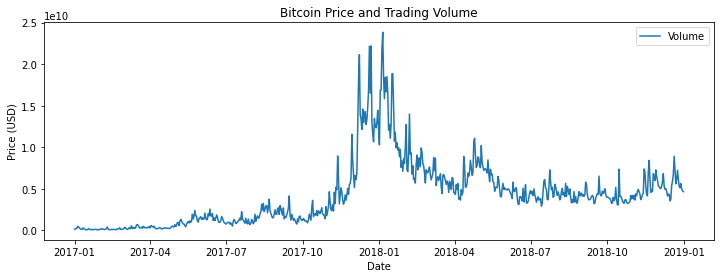

In [87]:
#Comparison between price and trading volume, scaled to the same range
plt.figure(figsize=(12, 4))
plt.plot(first_mp_data['Volume'], label='Volume')
plt.title('Bitcoin Price and Trading Volume')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

As shown above, the trading volume in BTC directly correlates to its price patterns. Although "micro" patterns between prices and volume do not show significant correlation, the major peak and drops do show heavy correlation, which is something to account for in the ARIMA model

The main takeaway from analyzing the first major peak of Bitcoin is to see how volume correlates with price.